In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [180]:
data=pd.read_csv("/content/drive/MyDrive/Project/train-chennai-sale.csv")
print(data.shape)
data.head()

(7109, 22)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATA CLEANING**

In [181]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Taking the most occuring value to replace the 'NAN' values

In [182]:
avgbath=data['N_BATHROOM'].mode()[0]
avgbed=data['N_BEDROOM'].mode()[0]

In [183]:
data['N_BATHROOM'].fillna(avgbath,inplace=True)
data['N_BEDROOM'].fillna(avgbed,inplace=True)

In [184]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Changing the data types of necessary columns

In [186]:
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'])
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])
data['N_BEDROOM']=data['N_BEDROOM'].astype(int)
data['N_BATHROOM']=data['N_BATHROOM'].astype(int)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

Creating a new column to measure the age of the building

In [188]:
data['AGE_OF_HOUSE']=data['DATE_SALE'].dt.year-data['DATE_BUILD'].dt.year
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_HOUSE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


Creating a column to measure the total price of the building

In [189]:
data['PRICE']=data['REG_FEE']+data["COMMIS"]+data['SALES_PRICE']
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_HOUSE,PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313


Correcting the spellings in required columns

In [190]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [191]:
map={'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Chormpet':'Chrompet','Adyr':'Adyar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','KKNagar':'KK Nagar'}
data['AREA']=data['AREA'].replace(map)
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [192]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [193]:
map={'AdjLand':'Adj Land','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'}
data['SALE_COND']=data['SALE_COND'].replace(map)
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [194]:
data['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [195]:
map={'Noo':'No'}
data['PARK_FACIL']=data['PARK_FACIL'].replace(map)
data['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [196]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [197]:
map={'Comercial':'Commercial','Other':'Others'}
data['BUILDTYPE']=data['BUILDTYPE'].replace(map)
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [198]:
data['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [199]:
map={'AllPub':'School','NoSeWa':'NoSewr','NoSewr ':'NoSewr','All Pub':'School'}
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace(map)
data['UTILITY_AVAIL'].unique()

array(['School', 'ELO', 'NoSewr'], dtype=object)

In [200]:
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [201]:
map={'Pavd':'Paved','NoAccess':'No Access'}
data['STREET']=data['STREET'].replace(map)
data['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**EXPLORATORY DATA ANALYSIS(EDA)**

Exploring each column

In [202]:
fig=px.histogram(data,x='AREA',color='AREA',title='<b>Area Wise Distribution<br>')
fig

Interpretation:The Area Which Contais Most Number Of Buildings is Chrompet

In [203]:
fig=px.bar(data,x='AREA',y='INT_SQFT',color='INT_SQFT',title='<b> Square Feet Wise Distribution')
fig

Interpretation: People Prefer Bigger Size Buildings More In KK Nagar

In [204]:
fig=px.bar(data,x='N_BEDROOM',y='N_BEDROOM',color='N_BEDROOM',title='<b> Bedroom wise distribution')
fig

Interpretation: Most Number Of People Prefer Buildings With 2 Bedrooms

In [205]:
fig=px.bar(data,x='N_BATHROOM',y='N_BATHROOM',color='N_BATHROOM',title='<b> Bathroom wise distribution')
fig

Imterpretation: People Prefer Buildings With 2 Bathrooms

In [206]:
fig=px.bar(data,x='N_ROOM',y='N_ROOM',color='N_ROOM',title='<b> Number of room wise distribution')
fig

Interpretation: Most People Prefer Buildings With 4 Rooms

In [207]:
fig=px.pie(data,values=data['SALE_COND'].value_counts(),names=data['SALE_COND'].unique(),title='<b> Distribution Of Condition Of Sales')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig

Interpretation: Most Number Of Buildings Are Sold For Family, AbNormal And Partial Conditions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



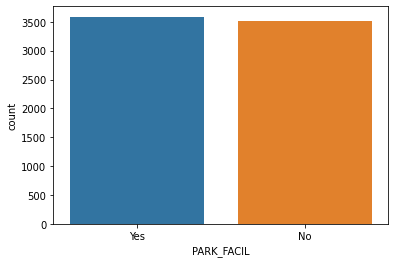

In [208]:
fig=sns.countplot(data['PARK_FACIL'])
fig

Interpretation: People Prefer Buildings With Parking Availability

In [209]:
fig=px.pie(data,values=data['UTILITY_AVAIL'].value_counts(),names=data['UTILITY_AVAIL'].unique(),title='<b> Distribution Of Utility Available')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig

Interpretation: People Prefer Buildings Near By Pubs

In [210]:
fig=px.pie(data,values=data['STREET'].value_counts(),names=data['STREET'].unique(),title='<b> Distribution Of Street')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig

Interpretation: People Prefer Paved Access

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



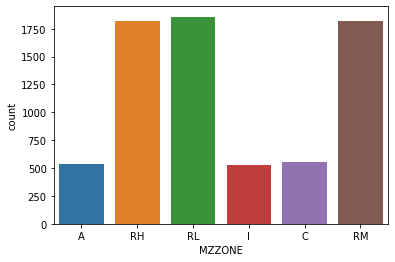

In [211]:
fig=sns.countplot(data['MZZONE'])
fig

Interpretation: Most People Prefer Zone RL

Feature Vs Target Plots

In [212]:
x=pd.DataFrame(data.groupby('AREA')['PRICE'].mean())
y=data['AREA'].unique()
y=sorted(y)
df={'AREA':y,"AVG_PRICE":x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='AREA',y='AVG_PRICE',color='AREA',title='<b>AREA AND PRICE DISTRIBUTION')
fig

Interpretation: There is a linear relationship between Area And Price

In [213]:
fig=px.line(data,x='INT_SQFT',y='PRICE',color='INT_SQFT',title='<b>Square Feet and Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Square Feet And Price

Text(0.5, 1.0, 'Distance From Mainroad And Price Distribution')

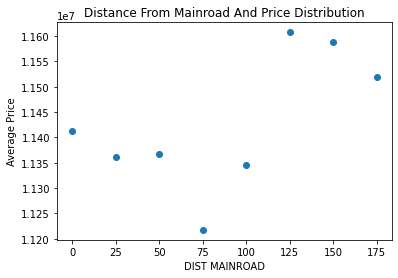

In [214]:
a = [data.loc[(data.DIST_MAINROAD > i) & (data.DIST_MAINROAD < (i+25)),'PRICE'].mean() for i in range(0,200,25)]

import matplotlib.pyplot as plt
plt.scatter(x = list(range(0,200,25)), y = a)
plt.xlabel('DIST MAINROAD')
plt.ylabel('Average Price')
plt.title('Distance From Mainroad And Price Distribution')

Interpretation: There Is No Linear Relation Between Distance From Mainroad And Price. So This Feature Is Not Important

In [215]:
x=pd.DataFrame(data.groupby('N_BEDROOM')['PRICE'].mean())
y=data['N_BEDROOM'].unique()
y=sorted(y)
df={'NO. BEDROOM':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
fig=px.bar(temp,x='NO. BEDROOM',y='AVG_PRICE',color='NO. BEDROOM',title='<b>Bedroom vs Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Bedroom And Price

In [216]:
x=pd.DataFrame(data.groupby('N_BATHROOM')['PRICE'].mean())
y=data['N_BATHROOM'].unique()
y=sorted(y)
df={'NO. BATHROOM':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
fig=px.bar(temp,x='NO. BATHROOM',y='AVG_PRICE',color='NO. BATHROOM',title='<b>Bathroom vs Price Distribution')
fig

Interpretaion: There Is A Linear Relation Between Bathroom And Price

In [217]:
x=pd.DataFrame(data.groupby('N_ROOM')['PRICE'].mean())
y=data['N_ROOM'].unique()
y=sorted(y)
df={'NO. ROOM':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
fig=px.bar(temp,x='NO. ROOM',y='AVG_PRICE',color='NO. ROOM',title='<b>Room vs Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Room And Price

In [218]:
x=pd.DataFrame(data.groupby('SALE_COND')['PRICE'].mean())
y=data['SALE_COND'].unique()
y=sorted(y)
df={'SALE CONDITION':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='SALE CONDITION',y='AVG_PRICE',color='SALE CONDITION',title='<b>Condition Of Sale vs Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Condition Of Sale And Price

In [219]:
x=pd.DataFrame(data.groupby('PARK_FACIL')['PRICE'].mean())
y=data['PARK_FACIL'].unique()
y=sorted(y)
df={'PARK_FACIL':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
fig=px.bar(temp,x='PARK_FACIL',y='AVG_PRICE',color='PARK_FACIL',title='<b>Parking Facility vs Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Parking Facility And Price

In [220]:
x=pd.DataFrame(data.groupby('BUILDTYPE')['PRICE'].mean())
y=data['BUILDTYPE'].unique()
y=sorted(y)
df={'BUILDTYPE':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='BUILDTYPE',y='AVG_PRICE',color='BUILDTYPE',title='<b>Type Of Building vs Price Distribution')
fig

Interpretation: There Is No Linear Relationship Between The Building Type And Price. But There is Some Relation

In [221]:
x=pd.DataFrame(data.groupby('UTILITY_AVAIL')['PRICE'].mean())
y=data['UTILITY_AVAIL'].unique()
y=sorted(y)
df={'UTILITY_AVAIL':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='UTILITY_AVAIL',y='AVG_PRICE',color='UTILITY_AVAIL',title='<b>Utility Available vs Price Distribution')
fig

Interpretation: There Is A Linear Relation Between Utility Available And Price

In [222]:
x=pd.DataFrame(data.groupby('STREET')['PRICE'].mean())
y=data['STREET'].unique()
y=sorted(y)
df={'STREET':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='STREET',y='AVG_PRICE',color='STREET',title='<b>Street vs Price Distribution')
fig

Interpretation: There Is No Linear Relation Between Street And Price. But There Is Some Relation

In [223]:
x=pd.DataFrame(data.groupby('MZZONE')['PRICE'].mean())
y=data['MZZONE'].unique()
y=sorted(y)
df={'MZZONE':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='MZZONE',y='AVG_PRICE',color='MZZONE',title='<b>Zone vs Price Distribution')
fig

Interpretation: There Is No Linear Relation Between Zone And Price. But There Is Some Relation

In [224]:
x=pd.DataFrame(data.groupby('AGE_OF_HOUSE')['PRICE'].mean())
y=data['AGE_OF_HOUSE'].unique()
y=sorted(y)
df={'AGE_OF_HOUSE':y,'AVG_PRICE':x['PRICE']}
temp=pd.DataFrame(df)
temp.sort_values('AVG_PRICE',inplace=True)
fig=px.bar(temp,x='AGE_OF_HOUSE',y='AVG_PRICE',color='AGE_OF_HOUSE',title='<b>Age Of House vs Price Distribution')
fig

Interpretation: There Is No Linear Relation Between Age Of House And Price

**PREPROCESSING MACHINE LEARNING MODEL**

In [225]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [249]:
data['AREA_ENC']=le.fit_transform(data['AREA'])
data['SALE_COND_ENC']=le.fit_transform(data['SALE_COND'])
data['PARK_FACIL_ENC']=le.fit_transform(data['PARK_FACIL'])
data['UTILITY_AVAIL_ENC']=le.fit_transform(data['UTILITY_AVAIL'])
data['BUILDTYPE_ENC']=le.fit_transform(data['BUILDTYPE'])
data['STREET_ENC']=le.fit_transform(data['STREET'])
data['MZZONE_ENC']=le.fit_transform(data['MZZONE'])

In [251]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,SALES_PRICE,AGE_OF_HOUSE,PRICE,AREA_ENC,SALE_COND_ENC,PARK_FACIL_ENC,UTILITY_AVAIL_ENC,BUILDTYPE_ENC,STREET_ENC,MZZONE_ENC
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,7600000,44,8124400,4,0,1,2,0,2,0
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,21717770,11,22781941,1,0,0,2,0,0,3
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,13159200,20,13672408,0,0,1,0,0,0,4
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,9630290,22,10063653,6,2,0,1,2,2,2
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,7406250,30,7717313,4,0,1,2,2,0,1


In [268]:
df=data.drop(['PRT_ID','DATE_SALE','DIST_MAINROAD','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','AREA','SALE_COND','PARK_FACIL','UTILITY_AVAIL','BUILDTYPE','STREET','MZZONE'],axis=1)

In [258]:
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,AGE_OF_HOUSE,PRICE,AREA_ENC,SALE_COND_ENC,PARK_FACIL_ENC,UTILITY_AVAIL_ENC,BUILDTYPE_ENC,STREET_ENC,MZZONE_ENC
0,1004,1,1,3,44,8124400,4,0,1,2,0,2,0
1,1986,2,1,5,11,22781941,1,0,0,2,0,0,3
2,909,1,1,3,20,13672408,0,0,1,0,0,0,4
3,1855,3,2,5,22,10063653,6,2,0,1,2,2,2
4,1226,1,1,3,30,7717313,4,0,1,2,2,0,1


In [259]:
x=df[['INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL_ENC','AGE_OF_HOUSE','AREA_ENC','SALE_COND_ENC','UTILITY_AVAIL_ENC','BUILDTYPE_ENC','STREET_ENC','MZZONE_ENC']].values
y=df['PRICE']

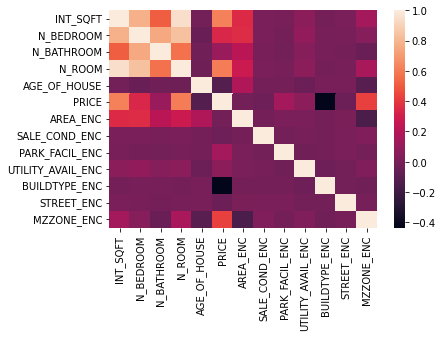

In [260]:
sns.heatmap(df.corr())

**SPLITTING MODEL INTO TRAINING AND TESTING SETS**

In [261]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

**FEATURE SCALING**

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
                   ('std_scalar',StandardScaler())
])
xtrain=pipeline.fit_transform(xtrain)
xtest=pipeline.fit_transform(xtest)

**LINEAR REGRESSION MODEL**

In [263]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(xtrain,ytrain)

In [264]:
print(model.intercept_)
print(model.coef_)

11460282.55506431
[ 2053138.06231566 -1220843.38882166  -508871.59362273  1753153.40231019
   583490.93519297  -236938.07293279  -517239.72688497  -177380.10449236
    76699.89290004 -1706306.00654436  -178739.79003027   997198.78952836]


In [265]:
y_pred=model.predict(xtest)

In [267]:
a=pd.DataFrame({"Actual":ytest,"Predicted":y_pred})
a

,Actual,Predicted
3913,13951324,1.325849e+07
2726,13538884,1.286059e+07
6220,20004028,1.670765e+07
2716,5189490,3.576432e+06
5459,14035224,1.316707e+07
...,...,...
549,7946771,8.468275e+06
6275,9744287,8.565754e+06
6772,14199569,1.654537e+07
2861,8995769,9.437482e+06


In [269]:
from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(ytest,y_pred))
print("Mean squared error",metrics.mean_squared_error(ytest,y_pred))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

Mean absolute error 1456973.0420195768
Mean squared error 3185160418243.559
Root mean squared error 1784701.7729143319


In [270]:
score=model.score(xtest,ytest)
score

0.7850347203237853

**DECISION TREE**

In [282]:
from sklearn import tree
model=tree.DecisionTreeRegressor().fit(xtrain,ytrain)

In [283]:
y_pred=model.predict(xtest)

In [284]:
a=pd.DataFrame({"Actual":ytest,"Predicted":y_pred})
a

,Actual,Predicted
3913,13951324,14299773.0
2726,13538884,12957652.0
6220,20004028,20423305.0
2716,5189490,4628531.0
5459,14035224,14823684.0
...,...,...
549,7946771,6784335.0
6275,9744287,10214891.0
6772,14199569,14649700.0
2861,8995769,9044450.0


In [288]:
score=model.score(xtest,ytest)
score

0.9599290161865379